## 3. Unsupervised Learning and Model Selection

You want to analyse a dataset to understand if there are groups of data points that share a common patterns. Your dataset consists of a set $\{\mathrm{x}_i\}_{i=i}^{\it{N}}, \mathrm{x}_i \in \mathbb{R}^D.$ You choose k-means for this purpose.

`(a)` [1/2 point] Is K-means a good choice? If yes, explain how is solves the problem. If not propose another strategy.

K-means is a good choice for clustering due to its computational efficiency and simplicity, making it suitable for large datasets with distinct, spherical clusters. It excels when preprocessed correctly, offering clear and interpretable cluster assignments.

`(b)` [1/2 point] You do not know which value of K to use. To choose K, you run K-means for $K = \{1, ...,N\}$ After convergence you compute the Within-Cluster-Sum of Squared error (WSS), where the squared error is the distance of a point to its associated prototype vector. The WSS is the sum of these squared errors for all the points in the dataset. Write the expression for WSS, when using the Euclidean distance and any given $K$.

The Within-Cluster Sum of Squares (WSS) for K-means clustering using Euclidean distance can be compactly expressed as:

$
\text{WSS} = \sum_{j=1}^{K} \sum_{i=1}^{N} r_{ij} \|\mathbf{x}_i - \mu_j\|^2
$

where:
- $ \mathbf{x}_i $ is the $ i $-th data point.
- $ \mu_j $ is the centroid of the $ j $-th cluster.
- $ r_{ij} $ is 1 if $ \mathbf{x}_i $ is in cluster $ j $, otherwise 0.
- $ \|\mathbf{x}_i - \mu_j\|^2 $ is the squared Euclidean distance between $ \mathbf{x}_i $ and $ \mu_j $.

`c)` [2 points] Sketch a plot showing how the WSS evolves as a function of $K$. Based on your plot, how would you choose $K$?

<img src=images/choosing_k.png weight='' height='' > </img>

### Numerical Example

---

In [1]:
# Number of clusters
k = 4

D = 2 # data point consists of features or coordinates.

# Define the number of points per cluster and dimensionality
N_per_cluster = 100

# Total number of data points
N = k * N_per_cluster  # since we have k clusters


400

In [2]:
using Clustering, Plots

In [3]:
# Generate synthetic data
function generate_data(N, D)
    # Random clusters centered around different means
    x₁ = randn(N, D) .+ [5 -5]
    x₂ = randn(N, D) .+ [-5 5]
    x₃ = randn(N, D) .+ [0 -5]
    return vcat(x₁, x₂, x₃)
end

generate_data (generic function with 1 method)

In [4]:
𝒟 = generate_data(N_per_cluster, D); @show 𝒟[:,1][1:3], 𝒟[:,2][1:3]


# Applying K-means
result = kmeans(𝒟', k)  # Transpose data to fit (features, observations)

# Extract cluster assignments
cluster_assignments = assignments(result); @show cluster_assignments[1:10];

((𝒟[:, 1])[1:3], (𝒟[:, 2])[1:3]) = ([5.9720892688125895, 5.727022694967422, 5.072985779969168], [-3.6864497994016237, -5.993304605892083, -2.882507678580089])
cluster_assignments[1:10] = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


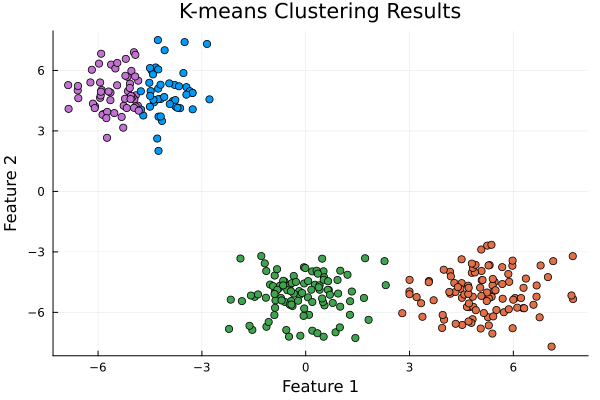

In [5]:
scatter(𝒟[:,1], 𝒟[:,2]
    , color=cluster_assignments, legend=false
    , title="K-means Clustering Results"
    , xlabel="Feature 1", ylabel="Feature 2"
    , markersize=4
)

In the formula $\{\mathrm{x}_i\}_{i=1}^{\it{N}}, \mathrm{x}_i \in \mathbb{R}^D$, there isn't a direct mention of $ k $ within this specific notation. However, in the context of clustering, especially when discussing K-means, $ k $ typically represents the number of clusters into which you want to divide your dataset.

To clarify:
- $ \{\mathrm{x}_i\}_{i=1}^{\it{N}} $: This represents the set of all data points indexed from 1 to $ N $, where $ N $ is the total number of data points.
- $ \mathrm{x}_i \in \mathbb{R}^D $: Each data point $ \mathrm{x}_i $ is a vector in a $ D $-dimensional real space, indicating that each data point consists of $ D $ features or coordinates.

When using K-means clustering:
- $ k $: This is a predefined parameter that specifies the number of clusters desired in the dataset. K-means algorithm will then attempt to partition the $ N $ data points into $ k $ clusters, where each point belongs to the cluster with the nearest mean, thereby minimizing the variance within each cluster.

So, while $ k $ isn't part of the original data set notation $\{\mathrm{x}_i\}_{i=1}^{\it{N}}, \mathrm{x}_i \in \mathbb{R}^D$, it becomes critical when you apply K-means clustering to this data, as it defines how many distinct groups you're attempting to identify within the dataset.

In [6]:
# Range of K to test
K_range = 1:10
WSS = zeros(length(K_range))

for (i, k) in enumerate(K_range)
    result = kmeans(transpose(𝒟), k)  # Apply K-means, note the transpose
    WSS[i] = sum(result.totalcost)  # Total cost gives the WSS for the clustering
end


In [7]:
p = plot(K_range, WSS
    , title="Elbow Method for Choosing K"
    , xlabel="Number of Clusters K", ylabel="WSS"
    , legend=false, marker=:circle
)
savefig(p, "images/choosing_k.png")

"/Users/valiha/Developer/ml/exams/2023/images/choosing_k.png"

<img src=images/choosing_k.png weight='' height='' > </img>

`d)` [2 points] You changed your mind. You now want to use hierarchical clustering with single linkage. Given the following distance marix points $\{ A, B, C, D\}$, draw the final dendogram. Describe each step.

| | A | B | C | D | 
|-|---|---|---|---|
|A| 0 | 1 | 4 | 5 |
|B| - | 0 | 2 | 6 |
|C| - | - | 0 | 3 |
|D| - | - | - | 0 |

To explain each step involved in drawing the final dendrogram for hierarchical clustering using single linkage, let's begin with the provided distance matrix for the points $ \{A, B, C, D\} $. Here's how the dendrogram is constructed:

### Distance Matrix:
The distances between the points are as follows:

$
\begin{array}{c|cccc}
 & A & B & C & D \\
\hline
A & 0 & 1 & 4 & 5 \\
B & 1 & 0 & 2 & 6 \\
C & 4 & 2 & 0 & 3 \\
D & 5 & 6 & 3 & 0 \\
\end{array}
$

### Hierarchical Clustering Steps:

1. **Initial Clusters**:
   - Begin with each point as its own cluster:
     $ \{A\}, \{B\}, \{C\}, \{D\} $

2. **First Merge**:
   - Find the smallest non-zero distance in the matrix, which is between $A$ and $B$ (distance = 1).
   - Merge $A$ and $B$ into cluster \{AB\}.
   - New set of clusters:
     $ \{AB\}, \{C\}, \{D\} $

3. **Update the Distance Matrix**:
   - For single linkage, the distance between the new cluster \{AB\} and other clusters is the minimum distance between the merged clusters and other clusters:
     - $ \text{Distance}(\{AB\}, C) = \min(4, 2) = 2 $
     - $ \text{Distance}(\{AB\}, D) = \min(5, 6) = 5 $
   - Updated partial matrix for remaining clusters:
     $
     \begin{array}{c|ccc}
     & AB & C & D \\
     \hline
     AB & 0 & 2 & 5 \\
     C & 2 & 0 & 3 \\
     D & 5 & 3 & 0 \\
     \end{array}
     $

4. **Second Merge**:
   - The next smallest distance is 2, between \{AB\} and $C$.
   - Merge \{AB\} and $C$ into \{ABC\}.
   - New clusters:
     $ \{ABC\}, \{D\} $

5. **Update the Distance Matrix Again**:
   - Calculate the new distances:
     - $ \text{Distance}(\{ABC\}, D) = \min(5, 3) = 3 $

6. **Final Merge**:
   - Merge \{ABC\} with $D$ (distance = 3).
   - All clusters are now merged into \{ABCD\}.

### Drawing the Dendrogram:
- The dendrogram visually represents these steps, showing the sequence and distance at which each merge occurs.
- Each horizontal line in the dendrogram represents a merge, with the height of the line indicating the distance at which the merge occurred.
- The sequence of merges reflects the order in which clusters combined:



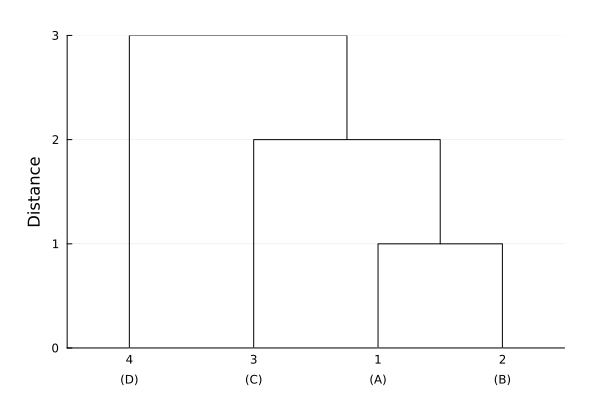

In [8]:
using Clustering, Plots, StatsPlots, Measures  # Ensure StatsPlots is included for dendrogram plotting

# Define the symmetric distance matrix
distances = [
    0 1 4 5;
    1 0 2 6;
    4 2 0 3;
    5 6 3 0
]

# Perform hierarchical clustering using single linkage
hc = hclust(distances, linkage=:single)

# Plot the dendrogram using StatsPlots, which extends Plots for statistical charts
dendrogram = plot(hc
    , ylabel="Distance"
    , margin = 7mm
)

# Attempt to add labels directly if possible
# This is pseudocode and may need adjustment based on your environment
for i in 1:length(hc.order)
    annotate!(dendrogram, i, -.3, text(["(A)", "(B)", "(C)", "(D)"][hc.order[i]], 8))
end

# Display the plot
display(dendrogram)


In this dendrogram:
- $A$ and $B$ merge first at a height of 1 (distance 1).
- $C$ joins $AB$ at a height of 2 (distance 2).
- Finally, $D$ merges with $ABC$ at a height of 3 (distance 3).

This hierarchical approach, using the single linkage criterion, emphasizes the closest connections between clusters, always merging the nearest available clusters first.

# References
- [ ] [Hierarchical Clustering: DENDROGRAMS - what are they, and how are they used?](https://www.youtube.com/watch?v=tDs-i2b49K0)